## Punto 1



In [ ]:
import csv
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
label_encoder = LabelEncoder()
scaler = StandardScaler()
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            f1_score, confusion_matrix, classification_report)
import matplotlib.pyplot as plt
from sklearn import tree
from google.colab import files

In [ ]:
url = "https://medata.gov.co/sites/default/files/distribution/1-026-22-000129/sivigila_bpn.csv"

try:
    df = pd.read_csv(url)
    print("Archivo leído correctamente desde la URL.")
except Exception as e:
    print(f"Error al leer el archivo desde la URL: {e}")

Archivo leído correctamente desde la URL.


In [ ]:
# Seleccionar las columnas de interés
df["evento"].value_counts()


,count
evento,
BAJO PESO AL NACER,10187


In [ ]:
df["peso_nacer"] = pd.to_numeric(df["peso_nacer"], errors="coerce")

df["clase_peso"] = df["peso_nacer"].apply(lambda x: "bajo_peso" if x < 2500 else "normal")

df["clase_peso"].value_counts()


,count
clase_peso,
bajo_peso,10185
normal,2


In [ ]:
umbral = 2300
df["clase_peso"] = df["peso_nacer"].apply(lambda x: "bajo_peso" if x < umbral else "normal")

df["clase_peso"].value_counts()


In [ ]:
# Verificar problemáticas en los datos
df[["sem_gest", "talla_nacer"]].apply(lambda col: col.unique())


In [ ]:
df = df[df["sem_gest"] != "SD"]

# Convertir "sem_gest" y "talla_nacer" a numérico
df["sem_gest"] = pd.to_numeric(df["sem_gest"], errors="coerce")
df["talla_nacer"] = pd.to_numeric(df["talla_nacer"], errors="coerce")

# Verificar que ya no haya valores problemáticos
df[["sem_gest", "talla_nacer"]].info()


In [ ]:



# Eliminar filas con valores nulos en "talla_nacer"

df = df.dropna(subset=["talla_nacer"])

# Seleccionar nuevamente las características y la variable objetivo
X = df[["edad_", "sem_gest", "talla_nacer"]]
y = df["clase_peso"]

# Codificar la variable objetivo
y_encoded = label_encoder.fit_transform(y)

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Normalizar características
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Verificar que los datos están listos
X_train_scaled.shape, X_test_scaled.shape


In [ ]:
# Probar diferentes valores de k
k_values = range(1, 100)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Encontrar el mejor valor de k
best_k = k_values[accuracies.index(max(accuracies))]
best_accuracy = max(accuracies)

best_k, best_accuracy

In [ ]:
import matplotlib.pyplot as plt

# Graficar la precisión en función de k
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b', label="Precisión")
plt.axvline(best_k, color='r', linestyle='--', label=f"Mejor k={best_k}")
plt.xlabel("Número de vecinos (k)")
plt.ylabel("Precisión en el conjunto de prueba")
plt.title("Precisión del modelo KNN según el valor de k")
plt.legend()
plt.grid(True)
plt.show()

## Punto 2

Saving emails.csv to emails.csv
╔════════════════════════════════════╗
║      Métricas de Evaluación        ║
╠════════════════════════════════════╣
║ Precisión (Accuracy): 80.68%  ║
║ Precisión (Precision): 88.71% ║
║ Sensibilidad (Recall): 37.16%   ║
║ F1-Score: 52.38%             ║
╚════════════════════════════════════╝

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.80      0.98      0.88       739
           1       0.89      0.37      0.52       296

    accuracy                           0.81      1035
   macro avg       0.84      0.68      0.70      1035
weighted avg       0.82      0.81      0.78      1035


Matriz de Confusión:
[[725  14]
 [186 110]]


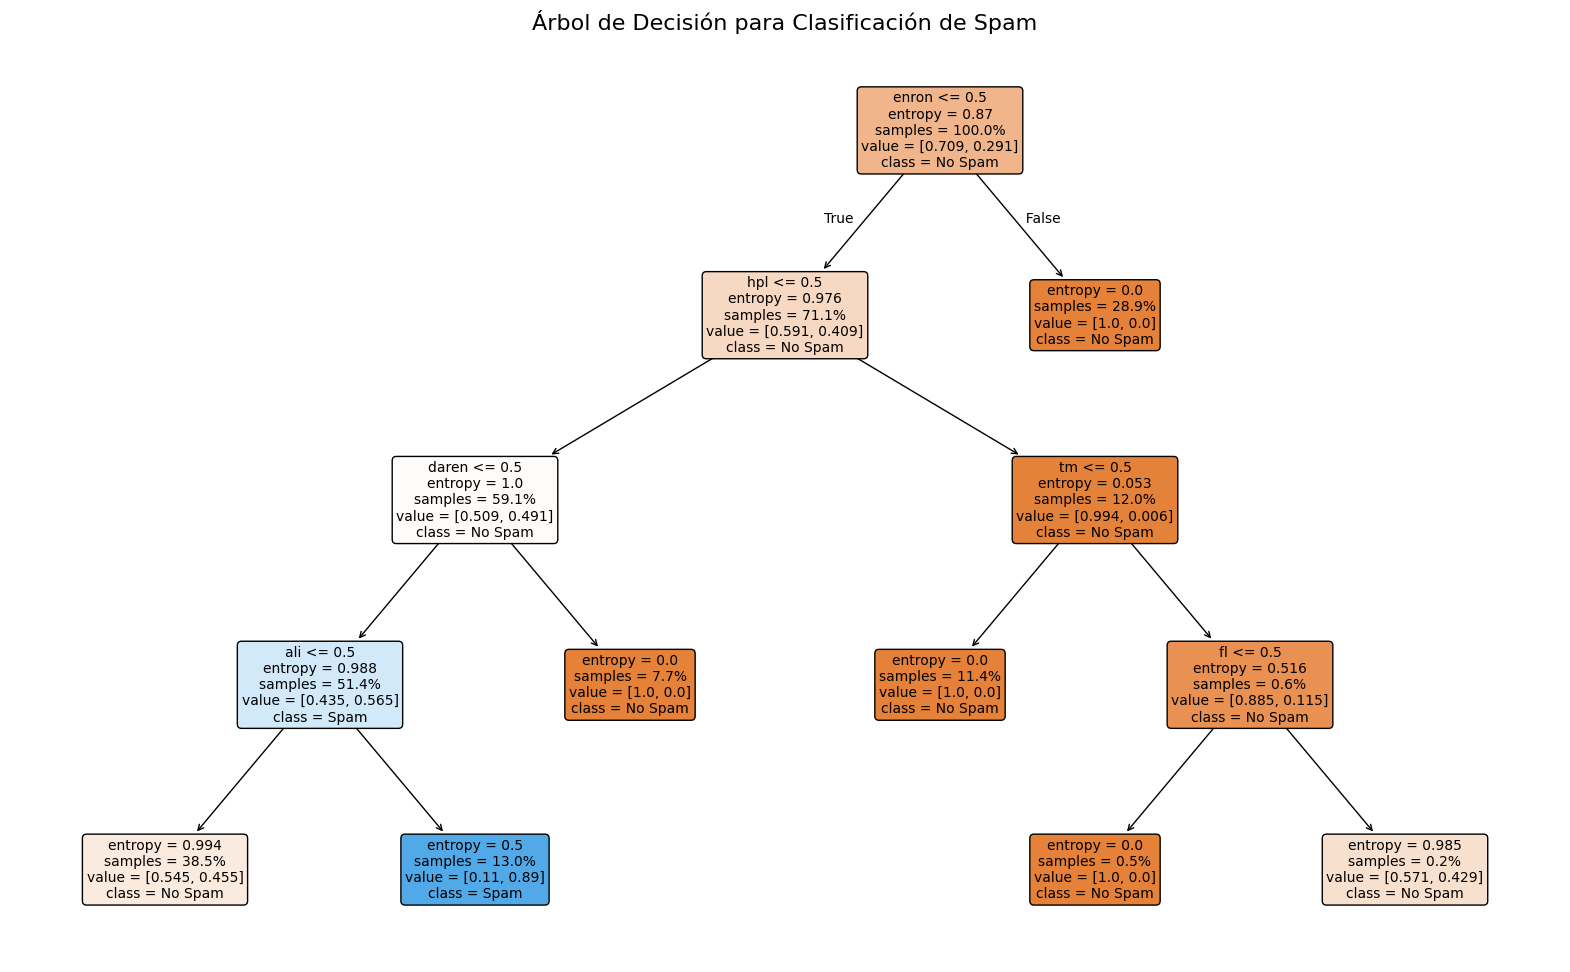


Mejores hiperparámetros encontrados:
{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}

Precisión con mejores parámetros: 91.88%


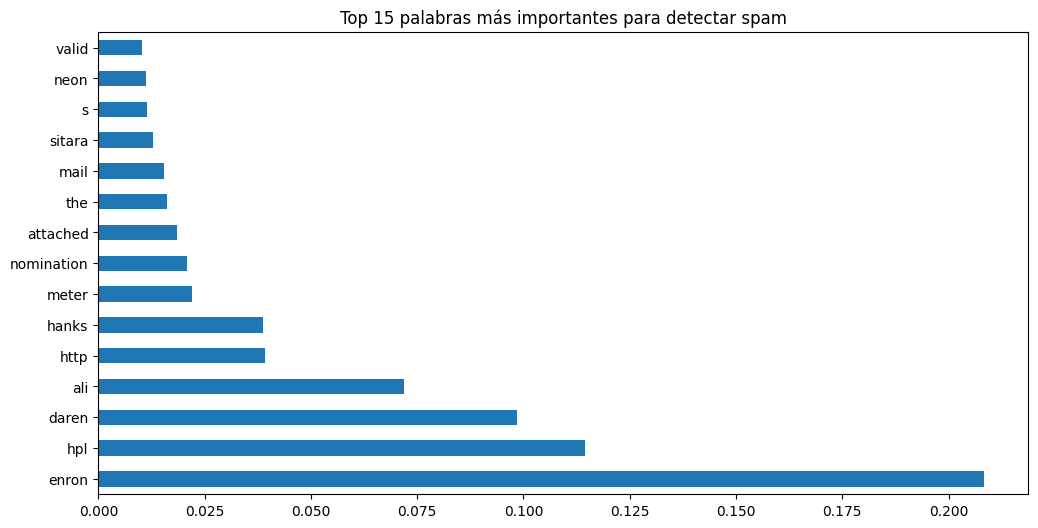

In [ ]:

uploaded = files.upload()
filename = list(uploaded.keys())[0]
data = pd.read_csv(filename)
X = data.drop(['Email No.', 'Prediction'], axis=1)
y = data['Prediction']

# 2. Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Configurar y entrenar el modelo con entropía
modelo_arbol = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=4,  # Limitamos la profundidad para mejor visualización
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)
modelo_arbol.fit(X_train, y_train)

# 4. Evaluar el modelo
y_pred = modelo_arbol.predict(X_test)

print("╔════════════════════════════════════╗")
print("║      Métricas de Evaluación        ║")
print("╠════════════════════════════════════╣")
print(f"║ Precisión (Accuracy): {accuracy_score(y_test, y_pred):.2%}  ║")
print(f"║ Precisión (Precision): {precision_score(y_test, y_pred):.2%} ║")
print(f"║ Sensibilidad (Recall): {recall_score(y_test, y_pred):.2%}   ║")
print(f"║ F1-Score: {f1_score(y_test, y_pred):.2%}             ║")
print("╚════════════════════════════════════╝")

# Reporte de clasificación detallado
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

# 5. Visualización del árbol de decisión
plt.figure(figsize=(20, 12))
plot_tree(
    modelo_arbol,
    feature_names=X.columns,
    class_names=['No Spam', 'Spam'],
    filled=True,
    rounded=True,
    proportion=True,
    fontsize=10
)
plt.title("Árbol de Decisión para Clasificación de Spam", fontsize=16)
plt.show()

# 6. Importancia de las características
importancias = modelo_arbol.feature_importances_
indices = importancias.argsort()[::-1][:15]  # Top 15 características

## Búsqueda de mejores hiperparámetros (opcional avanzado) ##
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'criterion': ['entropy']
}

grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy'
)

grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

print("\nMejores hiperparámetros encontrados:")
print(best_params)


best_clf = grid_search.best_estimator_
y_pred_best = best_clf.predict(X_test)
print(f"\nPrecisión con mejores parámetros: {accuracy_score(y_test, y_pred_best):.2%}")

# Visualización de importancia de características
plt.figure(figsize=(12, 6))
importances = best_clf.feature_importances_
top_features = pd.Series(importances, index=X.columns).sort_values(ascending=False).head(15)
top_features.plot(kind='barh')
plt.title('Top 15 palabras más importantes para detectar spam')
plt.show()